The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

**Developed by**: Esthefania Ortega  

**Date**: 06/September/2025

In [243]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!
df = pd.read_csv('data/nobel.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

What is the most commonly awarded gender?


The most awarded gender is Male


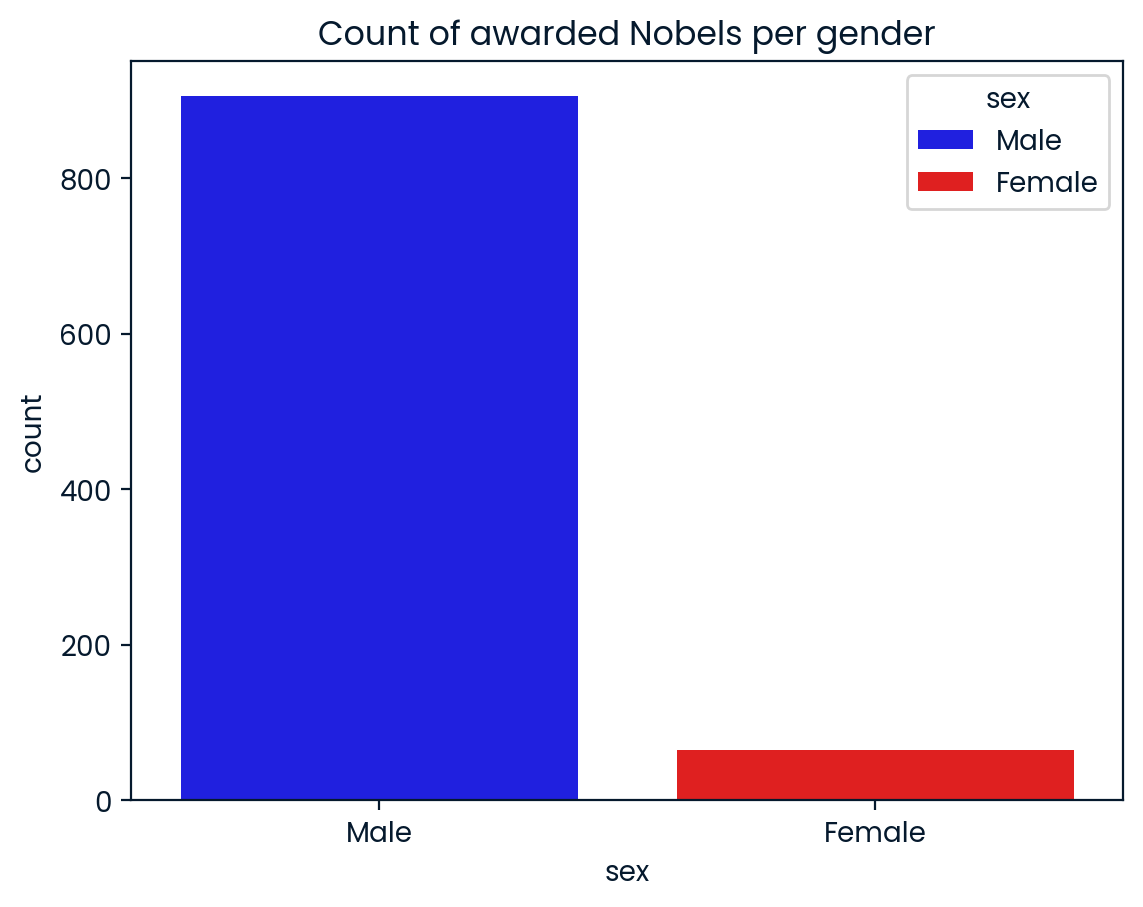

In [244]:
g = sns.countplot(x='sex', data = df, hue = 'sex')
g.set_title("Count of awarded Nobels per gender")
top_gender = df['sex'].mode()
top_gender = str(top_gender[0])
print("The most awarded gender is "+ top_gender)

What about most awarded birth country?

In [245]:
df['birth_country'].value_counts()
top_country = df['birth_country'].mode()
top_country = str(top_country[0])
print("The most awarded birth country is "+ top_country)

The most awarded birth country is United States of America


Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

2000


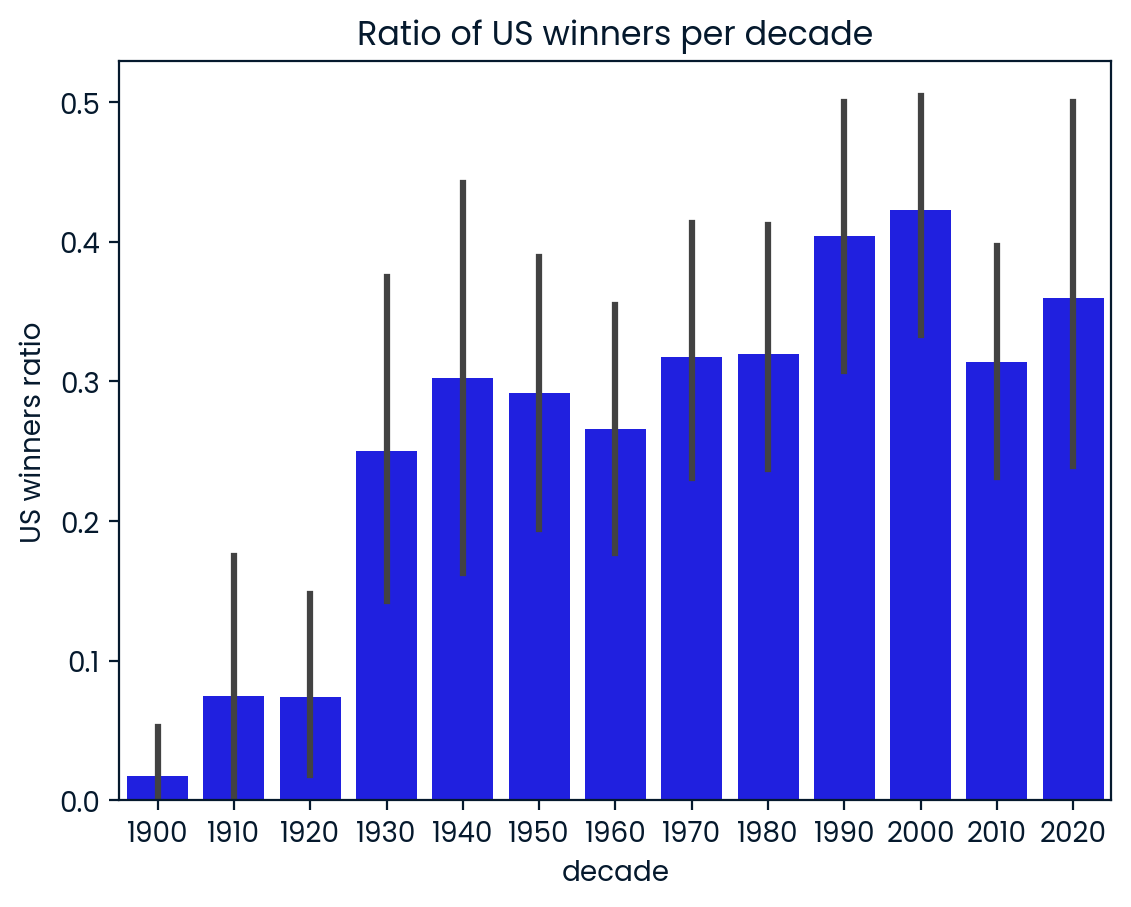

In [246]:
df['decade'] = ((df['year']/10).astype(int))*10
df['us_winner'] = df['birth_country']== "United States of America"
r = sns.barplot(x='decade',y='us_winner', data = df)
r.set(ylabel = "US winners ratio")
r.set_title("Ratio of US winners per decade")
decade_ratio = df.groupby('decade')['us_winner'].mean()
max_decade_usa = decade_ratio.idxmax()
print(max_decade_usa)

Which decade and Nobel Prize category combination had the highest proportion of female laureates?

{2020: 'Literature'}


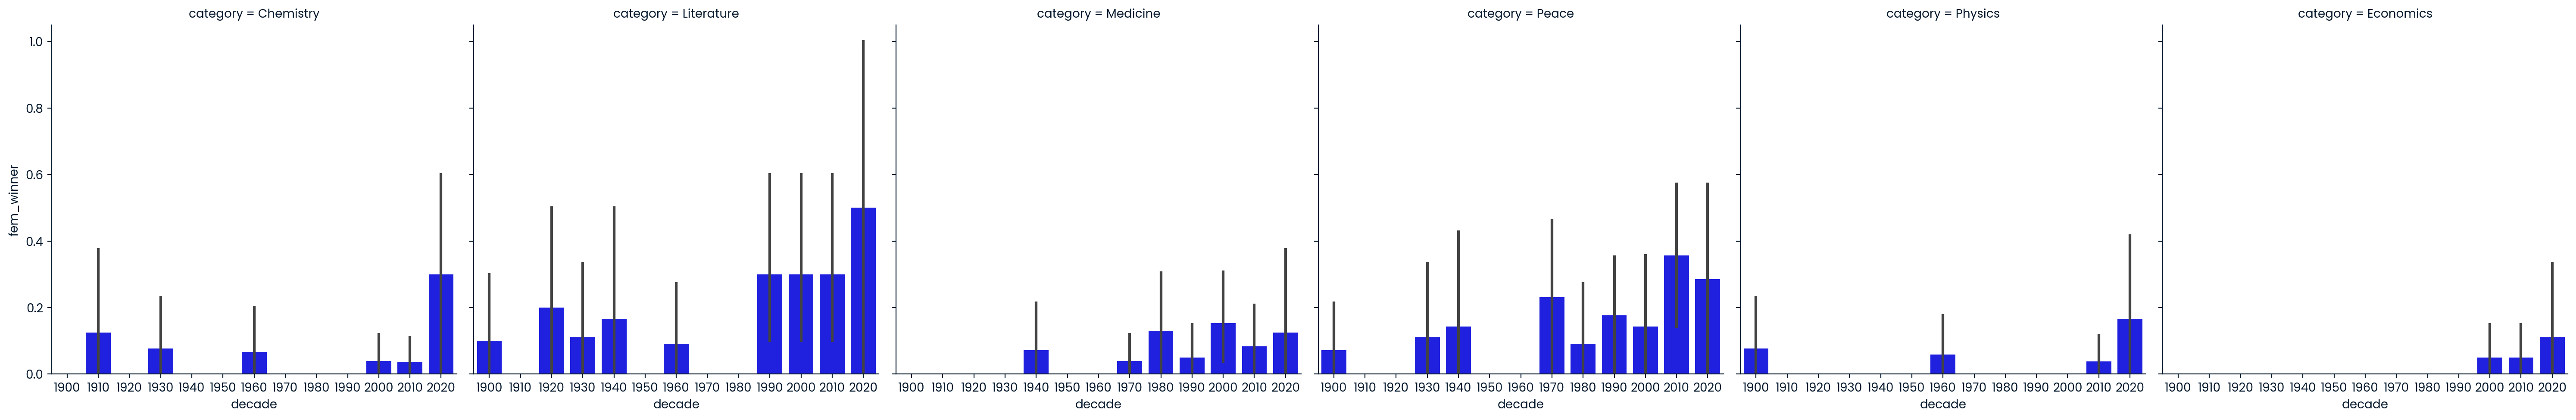

In [247]:
df['fem_winner'] = df['sex'] == 'Female'
f = sns.catplot(x='decade',y='fem_winner', data = df, kind = 'bar', col = 'category')
decade_ratio_fem = df.groupby(['decade','category'])['fem_winner'].mean().reset_index()
indexfmax = decade_ratio_fem['fem_winner'].idxmax()
max_female_dict = {decade_ratio_fem['decade'].loc[indexfmax]:decade_ratio_fem['category'].loc[indexfmax]}
print(max_female_dict)

Who was the first woman to receive a Nobel Prize, and in what category?

In [248]:
df_femsorted = df[df['fem_winner']].sort_values(by='year', ascending = True)
first_woman_name = df_femsorted['full_name'].iloc[0]
first_woman_category = df_femsorted['category'].iloc[0]
print(df_femsorted.iloc[0])

year                                                                 1903
category                                                          Physics
prize                                     The Nobel Prize in Physics 1903
motivation              "in recognition of the extraordinary services ...
prize_share                                                           1/4
laureate_id                                                             6
laureate_type                                                  Individual
full_name                                     Marie Curie, née Sklodowska
birth_date                                                     1867-11-07
birth_city                                                         Warsaw
birth_country                                     Russian Empire (Poland)
sex                                                                Female
organization_name                                                     NaN
organization_city                     

Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [249]:
duplicates = df.duplicated(subset = ['full_name'], keep = False)
repeat_list = df[duplicates]['full_name'].unique().tolist()

print(repeat_list)

['Marie Curie, née Sklodowska', 'Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Frederick Sanger']
